# Assignment 10
- Run Grad CAM on VGG network for Imagenet images
- Run Grad CAM for last convolution layer and two layers before that
- Run Grad CAM on this [Image](https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg)  and locate sunglasses

## Loading the VGG with pretrained Imagenet weights and plotting grad cam for 4 images

In [0]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
img = image.load_img('image.jpg', target_size=(224,224))
print(f"Class of img: {type(img)}")
x = image.img_to_array(img)[np.newaxis,:]
x = preprocess_input(x)
print(f"Image Shape: {x.shape}")

Class of img: <class 'PIL.Image.Image'>
Image Shape: (1, 224, 224, 3)


In [0]:
model = VGG16(weights="imagenet")
out = np.argmax(model.predict(x)[0])

In [16]:
# Download 4 images
!wget -O 'fox.jpg' 'https://images.pexels.com/photos/247399/pexels-photo-247399.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'
!wget -O 'dog.jpg' 'https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'
!wget -O 'fish.jpg' 'https://images.pexels.com/photos/213399/pexels-photo-213399.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'
!wget -O 'cat.jpg' 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'

--2019-12-14 05:18:35--  https://images.pexels.com/photos/247399/pexels-photo-247399.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21793 (21K) [image/jpeg]
Saving to: ‘fox.jpg’

fox.jpg             100%[===================>]  21.28K  --.-KB/s    in 0s      

2019-12-14 05:18:35 (132 MB/s) - ‘fox.jpg’ saved [21793/21793]

--2019-12-14 05:18:38--  https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [image/jpeg]
Saving to: ‘dog.jpg’

dog

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


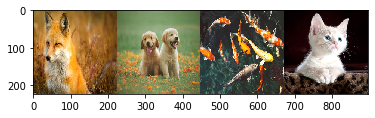

In [73]:
img1 = image.img_to_array(image.load_img('fox.jpg',target_size=(224,224)))
img2 = image.img_to_array(image.load_img('dog.jpg',target_size=(224,224)))
img3 = image.img_to_array(image.load_img('fish.jpg',target_size=(224,224)))
img4 = image.img_to_array(image.load_img('cat.jpg',target_size=(224,224)))

plt.imshow(np.hstack([img1,img2,img3,img4])/225)
# print(img1)
# plt.imshow(img1/225)

In [0]:
pp_img1 = preprocess_input(img1)
pp_img2 = preprocess_input(img2)
pp_img3 = preprocess_input(img3)
pp_img4 = preprocess_input(img4)

In [0]:
def plot_gradcam_grid(conv_layer, model, images,class_idx=None):
    """
        Given a batch of images, this function will plot the grad cam for them
    """

    for img in images:
        # print(img)
        if class_idx == None:
            class_idx = np.argmax(model.predict(preprocess_input(img)[np.newaxis,:]))
        class_out = model.output[:, class_idx]
        grads = K.gradients(class_out, conv_layer.output)[0]
        pooled_grads = K.mean(grads, axis=(0,1,2))
        iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])

        pooled_grads, conv_layer_output = iterate([img[np.newaxis,:]])
        for i in range(pooled_grads.shape[0]):
            conv_layer_output[:,:,i] *= pooled_grads[i]

        heatmap = np.mean(conv_layer_output,axis=-1)
        heatmap = np.maximum(heatmap, 0) # This is to make sure all values are above 0
        heatmap /= np.max(heatmap)

        heatmap = cv2.resize(heatmap, (img.shapVGGe[0],img.shape[1]))
        fig, ax = plt.subplots(1,2)
        ax[0].imshow(img/225)
        ax[1].imshow(img/225,alpha=0.85)
        ax[1].imshow(heatmap, alpha=0.6)



In [0]:
layer1 = model.get_layer('block5_conv3')
layer2 = model.get_layer('block5_conv2')
layer3 = model.get_layer('block5_pool')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


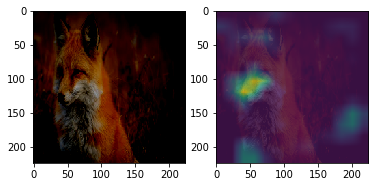

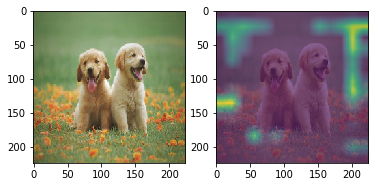

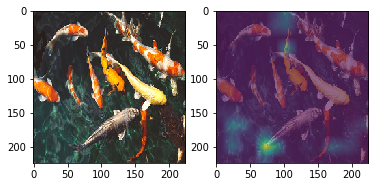

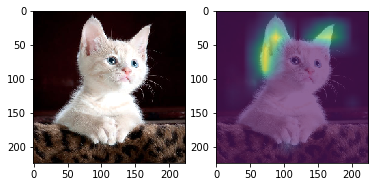

In [82]:
plot_gradcam_grid(layer1, model, [img1.copy(),img2.copy(),img3.copy(),img4.copy()])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


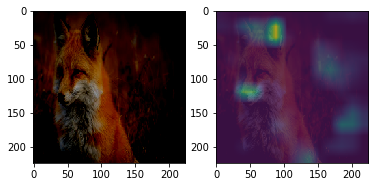

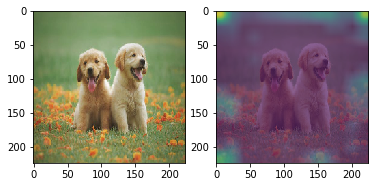

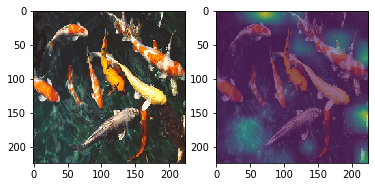

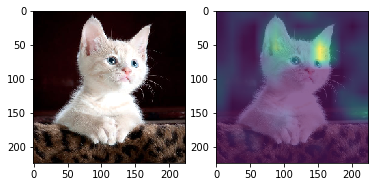

In [83]:
plot_gradcam_grid(layer2, model, [img1.copy(),img2.copy(),img3.copy(),img4.copy()])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


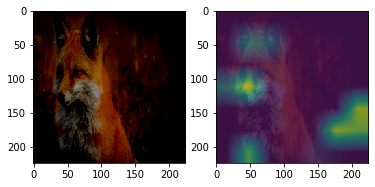

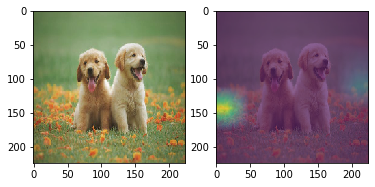

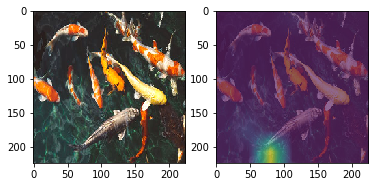

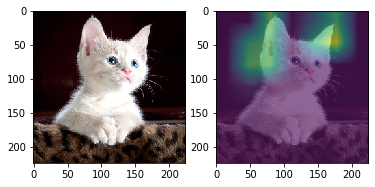

In [84]:
plot_gradcam_grid(layer3, model, [img1.copy(),img2.copy(),img3.copy(),img4.copy()])

## Find sunglasses

In [0]:

# Downloading the Tony Stark
!wget -O 'tony.jpg' 'https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


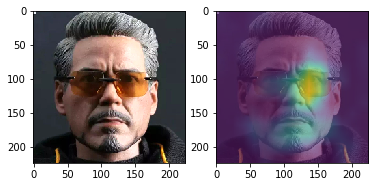

In [89]:

img_sunglass = image.img_to_array(image.load_img('tony.jpg', target_size=(224,224)))
class_idx_sunglass = 836
plot_gradcam_grid(layer1, model, [img_sunglass.copy()], class_idx=class_idx_sunglass)